In [10]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

/Users/augustguo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# check sklearn version 
sklearn.__version__

'0.23.1'

In [70]:
# load the training data
df = pd.read_csv('./titanic_train.csv')

In [71]:
df.shape

(891, 12)

In [72]:
# check na 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

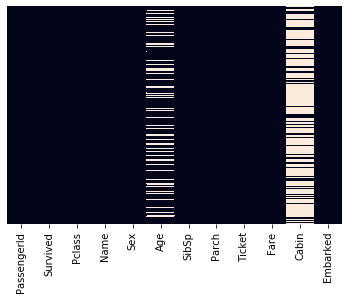

In [73]:
# visualize na distribution 
sns.heatmap(df.isna(), yticklabels=False, cbar=False)
plt.show()

In [74]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
# select columns to be used 
df = df.loc[df.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked']]

In [76]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Embarked    0
dtype: int64

In [79]:
X = df.drop(['Survived'], axis=1)
y= df.Survived

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=36)

In [86]:
# feature data with one feature 
X1_train = X_train.loc[:, ['Pclass']]

In [87]:
print(X1_train.shape)
print(y_train.shape)

(666, 1)
(666,)


In [88]:
# fit logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [90]:
# check cross validating accuracy 
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X1_train, y_train, cv=5, scoring='accuracy').mean()

0.678678038379531

In [91]:
# check null accuracy as baseline 
y_train.value_counts(normalize=True)

0    0.617117
1    0.382883
Name: Survived, dtype: float64

In [92]:
X_train.head()

,Pclass,Sex,Embarked
411,3,male,Q
122,2,male,C
118,1,male,C
483,3,female,S
445,1,male,S


In [95]:
# check how onehotencode works
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [96]:
ohe.fit_transform(X_train[['Sex']])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [97]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [98]:
ohe.fit_transform(X_train[['Embarked']])

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [99]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [102]:
# feature data with 3 features
X3_train = X_train
X3_train.head()

,Pclass,Sex,Embarked
411,3,male,Q
122,2,male,C
118,1,male,C
483,3,female,S
445,1,male,S


In [103]:
# use column transformer to selectively onehotencode sex and embarked but pass through Pclass as is
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough')

In [104]:
column_trans.fit_transform(X3_train)

array([[0., 1., 0., 1., 0., 3.],
       [0., 1., 1., 0., 0., 2.],
       [0., 1., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1., 3.],
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 3.]])

In [105]:
from sklearn.pipeline import make_pipeline
# use pipeline to chain preprocessing and modeling steps
pipe = make_pipeline(column_trans, logreg)

In [106]:
# check prediction performance 
cross_val_score(pipe, X3_train, y_train, cv=5, scoring='accuracy').mean()

0.7972954774997195

In [107]:
# fit the pipe with the 3 features training data
pipe.fit(X3_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('logisticregression', LogisticRegression())])

In [109]:
# check prediction accuracy on test set
pipe.score(X_test, y_test)

0.7533632286995515